In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/camnugent/california-housing-prices'

od.download(url)

Skipping, found downloaded files in "./california-housing-prices" (use force=True to force download)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

data_set = pd.read_csv('./california-housing-prices/housing.csv')
data_set.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6076,-117.87,34.07,21.0,4723.0,882.0,2210.0,768.0,3.8167,258700.0,<1H OCEAN
8761,-118.38,33.82,34.0,1822.0,364.0,750.0,366.0,5.9907,500001.0,NEAR OCEAN
19662,-120.85,37.50,52.0,1724.0,352.0,922.0,348.0,1.7227,85700.0,INLAND
7021,-118.10,33.98,34.0,1357.0,310.0,1042.0,287.0,3.4083,156700.0,<1H OCEAN
17741,-121.74,37.30,12.0,1961.0,280.0,985.0,269.0,6.7159,362700.0,<1H OCEAN
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN
1569,-121.98,37.74,8.0,2865.0,389.0,1376.0,417.0,7.9393,399300.0,<1H OCEAN
19996,-119.45,36.16,27.0,2119.0,373.0,1268.0,345.0,2.8152,106900.0,INLAND
16967,-122.31,37.54,49.0,1340.0,281.0,660.0,284.0,4.1630,393800.0,NEAR OCEAN
4068,-118.48,34.15,31.0,2536.0,429.0,990.0,424.0,5.4591,495500.0,<1H OCEAN


In [4]:
data_set.shape

(20640, 10)

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


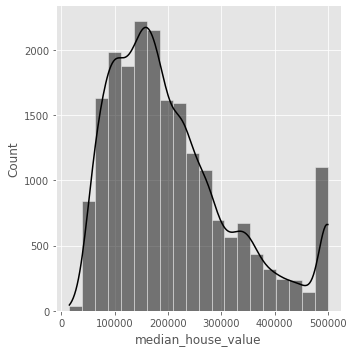

In [7]:

sns.displot(data_set['median_house_value'], color='k', bins=20, kde=True)

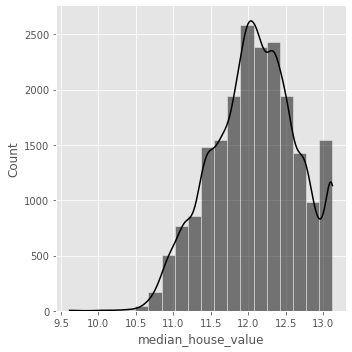

In [8]:
sns.displot(np.log1p(data_set['median_house_value']), color='k', bins=20, kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b2507dd50>,
      dtype=object)

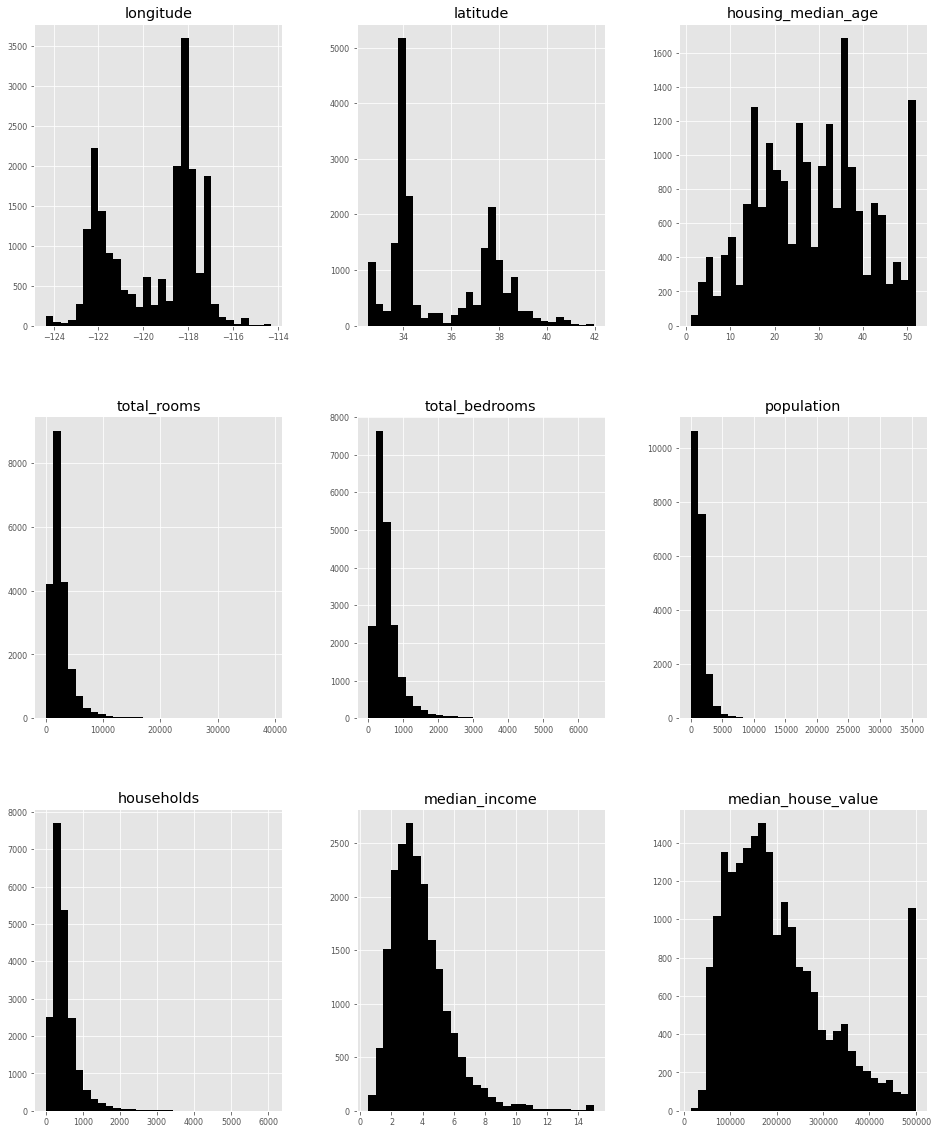

In [9]:
numerical_features = data_set.select_dtypes(include = ['float64'])
numerical_features.hist(figsize=(16, 20), color = 'k', bins=30, xlabelsize=8, ylabelsize=8)

In [10]:
data_set.drop(columns=['ocean_proximity'], inplace=True)

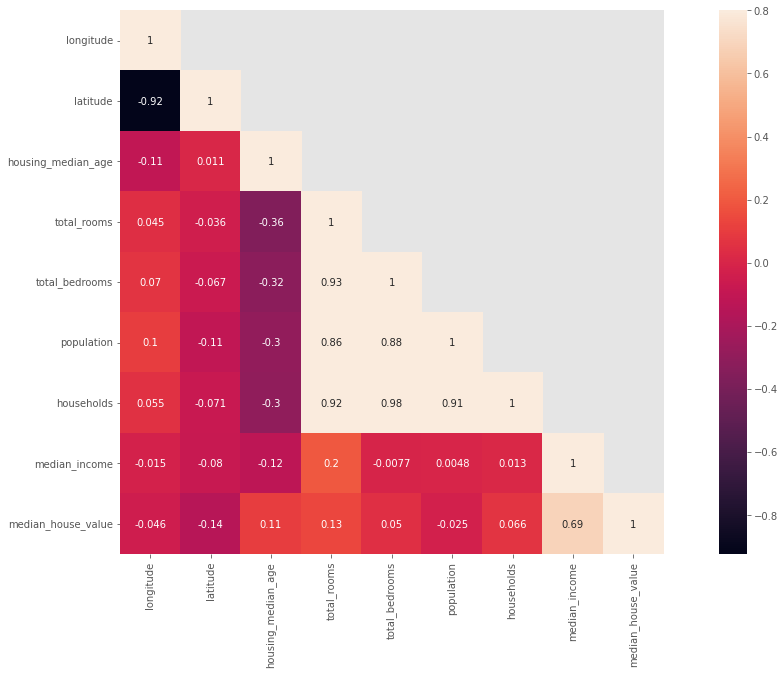

In [11]:
corr_mat = data_set.corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_mat, mask=mask,vmax=.8, square=True,annot=True)

### Question 1
Find a feature with missing values. How many missing values does it have?

In [12]:
print(f'There are {data_set.isna().sum().sum()} missing values.')

There are 207 missing values.


## Question 2
What's the median (50% percentile) for variable 'population'?

In [13]:
print(f"The median of population: {data_set['population'].median()}")

The median of population: 1166.0


## Split the data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]

    return res

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def missing_values(df, is_mean=False):
  data = df.copy()
  for col in data:
    if data[col].isna().sum() != 0:
      if is_mean:
        data[col] = data[col].fillna(data[col].mean(), axis=0)
      else:
        data[col] = data[col].fillna(0, axis=0)
  return data


'''def val_framework(X, y,log_1=False):
  if log_1:
    y = np.log1p(y)

  X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  dev_size = X_test.shape[0] / X.shape[0]

  X_train, X_dev, y_train, y_dev = train_test_split(X, y, 
                                    test_size = dev_size,
                                    random_state=42)
  
  return  X_train, y_train, X_dev, y_dev, X_test, y_test
'''

def val_framework(X, y,log_1=False, is_seed=False):
  seeds =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 42]
  seeds_perform = {}
  if log_1:
    y = np.log1p(y)
  
  if is_seed:
    for i in seeds[:-1]:
      X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state=i)
      dev_size = X_test.shape[0] / X.shape[0]
      X_train, X_dev, y_train, y_dev = train_test_split(X, y, 
                                    test_size = dev_size,
                                    random_state=i)
      seeds_perform[i] = ( X_train, y_train, X_dev, y_dev, X_test, y_test)
    return seeds_perform

  else:
    X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state=seeds[-1])
    dev_size = X_test.shape[0] / X.shape[0]
    X_train, X_dev, y_train, y_dev = train_test_split(X, y,
                                                      test_size = dev_size,
                                                      random_state=seeds[-1])
    return X_train, y_train, X_dev, y_dev, X_test, y_test


def error(X, y, graph=True):
  w0, w = train_linear_regression(X, y)
  y_pred = w0 + X.dot(w)

  if graph:
    plt.figure(figsize=(9,6))
    sns.histplot(y, color='blue', alpha=.8, bins=50, kde=True)
    sns.histplot(y_pred, color='red', alpha=.8, bins=50, kde=True)
    plt.show()

  return round(mean_squared_error(y, y_pred, squared=False), 2)

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [15]:
df_num = data_set.copy()

# Question 3

In [16]:
#df_num['total_bedrooms'].sample(50) # 14173
df_num.loc[14173]

longitude               -117.0500
latitude                  32.7500
housing_median_age        36.0000
total_rooms             2024.0000
total_bedrooms                NaN
population              1030.0000
households               390.0000
median_income              3.8233
median_house_value    139800.0000
Name: 14173, dtype: float64

In [17]:
df_num.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## With mean

In [18]:
df_num = missing_values(df_num, is_mean=True)

In [19]:
df_num.loc[14173]

longitude               -117.050000
latitude                  32.750000
housing_median_age        36.000000
total_rooms             2024.000000
total_bedrooms           537.870553
population              1030.000000
households               390.000000
median_income              3.823300
median_house_value    139800.000000
Name: 14173, dtype: float64

In [20]:
X, y = df_num.drop(columns=['median_house_value']), df_num['median_house_value']
X_train, y_train, X_dev, y_dev, X_test, y_test = val_framework(X, y,log_1=True)

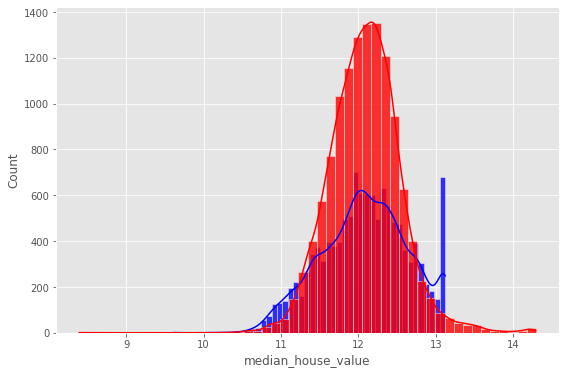

0.34

In [21]:
error(X_train, y_train)

## with zeros

In [22]:
df_num_zero = data_set.copy()

In [23]:
df_num_zero.loc[14173]

longitude               -117.0500
latitude                  32.7500
housing_median_age        36.0000
total_rooms             2024.0000
total_bedrooms                NaN
population              1030.0000
households               390.0000
median_income              3.8233
median_house_value    139800.0000
Name: 14173, dtype: float64

In [24]:
df_num_zero = missing_values(df_num_zero, is_mean=False)

In [25]:
df_num_zero.loc[14173]

longitude               -117.0500
latitude                  32.7500
housing_median_age        36.0000
total_rooms             2024.0000
total_bedrooms             0.0000
population              1030.0000
households               390.0000
median_income              3.8233
median_house_value    139800.0000
Name: 14173, dtype: float64

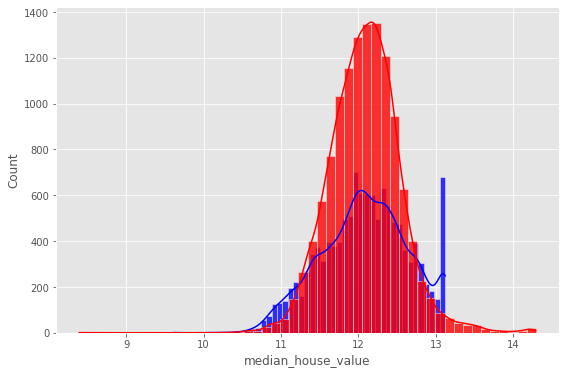

0.34

In [26]:
X, y = df_num_zero.drop(columns=['median_house_value']), df_num_zero['median_house_value']
X_train_z, y_train_z, X_dev_z, y_dev_z, X_test_z, y_test_z = val_framework(X, y,log_1=True)

error(X_train_z, y_train_z)

Both are equally good

# Question 4

In [27]:
def best_r(xt=X_train_z, yt=y_train_z, Xr=X_dev_z, yr=y_dev_z):
  lrs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
  predictions = []
  W = []
  for i in range(len(lrs)):
    w0, w = train_linear_regression_reg(X_train_z, yt, r=i)
    W.append(round(w0,2))
    y_pred = w0 + Xr.dot(w)
    err = round(mean_squared_error(yr, y_pred, squared=False),2)
    predictions.append(err)
  
  return sorted(list(zip(lrs, W, predictions)), key=lambda x : x[-1])


In [28]:
best_r()

[(0, -11.95, 0.34),
 (1e-06, -5.08, 0.34),
 (0.0001, -3.23, 0.34),
 (0.001, -2.36, 0.35),
 (0.01, -1.87, 0.35),
 (0.1, -1.54, 0.35),
 (1, -1.31, 0.35),
 (5, -1.14, 0.35),
 (10, -1.01, 0.35)]

`r` in 0, $1.e^{-6}$ and 0.0001 have the smallest error 0.34. Since there are multiple options, I select 0 for  the smallest `r`.

# Question 5

In [29]:
df_num = missing_values(df_num, is_mean=False)
X, y = df_num.drop(columns=['median_house_value']), df_num['median_house_value']

all_seeds = val_framework(X, y,log_1=True, is_seed=True)
predictions = []
for i in range(len(all_seeds)):
  X_train, y_train, X_dev, y_dev, X_test, y_test  = all_seeds[i]
  w0, w = train_linear_regression(X_train, y_train)
  y_pred = w0 + X_dev.dot(w)
  err = round(mean_squared_error(y_dev, y_pred, squared=False),2)
  predictions.append(err)
print(predictions)
print(round(np.std(predictions),3))

[0.35, 0.35, 0.35, 0.36, 0.34, 0.34, 0.34, 0.35, 0.33, 0.36]
0.009


The value of **0.009** that I found is the closest to **0.005** so I chose **0.005** as an std

# Question 6

In [30]:
X_train, y_train, X_dev, y_dev, X_test, y_test = all_seeds[9]

full_X = pd.concat([X_train, X_dev],axis=0)
full_X = full_X.reset_index(drop=True)
full_y = pd.concat([y_train, y_dev], axis=0)

w0, w = train_linear_regression_reg(full_X, full_y, r=0.001)
y_pred = w0 + X_test.dot(w)
err = round(mean_squared_error(y_test, y_pred, squared=False),2)

In [31]:
err

0.35